In [52]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [53]:
# open training set, copy labels, drop labels from set

train = pd.read_csv('train.csv')
train_labels = train['label'] 
train = train.drop('label', axis=1)


In [73]:
#create numpy array from pandas dataframe for future manipulation

train_array = train.values
labels_array = labels.values

X, Y = train_array, labels_array  #create tuple couple to keep organized

X.shape


(42000, 784)

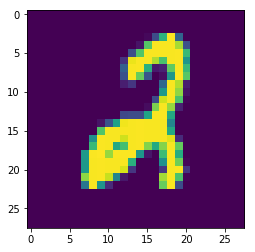

2

In [55]:
#plot a number to make sure they are in right format

random_digit = X[199]
random_digit_image = random_digit.reshape(28, 28)           #reshape to 28 by 28 array which is pixels of orig image
plt.imshow(random_digit_image)
plt.show()
Y[199]               #value should match image if tuple couple is correct

In [56]:
# Binary Classifier - simplify problem and start by identifying only '2 or 'not 2

# Seperate Training and Test Set

X_train, X_test, Y_train, Y_test = X[:32000], X[32000:], Y[:32000], Y[32000:]

Y_train_2= (Y_train == 2)    #True for 2 false for all other
Y_test_2= (Y_test == 2)

In [57]:
# Classifier Selection and Training
# SGD = Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train_2)

sgd_clf.predict([random_digit])     #test on digit from above, it guesses true! Now time to evaluate model performance


c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ True], dtype=bool)

In [58]:
# first evaluation using cross-validation

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, Y_train_2, cv=3, scoring='accuracy')  

#although accuracy > 96%, a simple not 5 classifier would be around 90% so need a better way to evaluate

c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\stochastic_gr

array([ 0.9703787 ,  0.96831052,  0.96681043])

In [59]:
# time to make a confusion matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_2, cv=3)  #creates 'clean' predictions from the data

confusion_matrix(Y_train_2, Y_train_pred)

# rows of confusion matrix = actual class, columns = predicted class. top right = false positives, bottom left= false negatives

c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\stochastic_gr

array([[28288,   498],
       [  510,  2704]], dtype=int64)

In [60]:
# Precision (accuracy of positive pred) and Recall (ratio of correct positive instances) Calculation

from sklearn.metrics import precision_score, recall_score

precision_score(Y_train_2, Y_train_pred), recall_score(Y_train_2, Y_train_pred) #gives around 84% for both


(0.84447220487195507, 0.8413192283758556)

In [62]:
# F1 score = harmonic mean (combines recall and precision into single metric)

from sklearn.metrics import f1_score

f1_score(Y_train_2, Y_train_pred)


0.84289276807980063

In [65]:
# ok binary classifier isn't great but time to scale to a multiclass classifier 

sgd_clf.fit(X_train, Y_train) #trains target class from 0-9. Trains 10 binary classifiers and picks strongest output
sgd_clf.predict([random_digit]) # predicts what this digit is, it gets it right!

c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([2], dtype=int64)

In [68]:
#let's check out the cross_val score
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring='accuracy')



c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\stochastic_gr

array([ 0.86243089,  0.83238024,  0.8399925 ])

In [71]:
# time to check out a random forest classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, Y_train)
forest_clf.predict([random_digit])

array([2], dtype=int64)

In [72]:
cross_val_score(forest_clf, X_train, Y_train, cv=3, scoring='accuracy')

array([ 0.92971605,  0.92818974,  0.9289064 ])